The purpose of this activity is to use Transfer Learning and realise that how the model forgets the old data and gets accustomed to the new data. Here, initially, two binary classification models, A & B, will be trained. A will be trained on the data set having only 1s and 7s while B will be trained on the data set having only 3s and 8s. Then, model A will be used for transfer learning on data set having 3s and 8s whereas model B will be used for transfer learning on data set having 1s and 7s. The new models will be called model AB and BA  respectively.

In [1]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Mounted at /content/gdrive
11490434/11490434 [==============================] - 1s 0us/step


In [2]:
x_train_A, y_train_A, x_test_A, y_test_A = [], [], [], []
x_train_B, y_train_B, x_test_B, y_test_B = [], [], [], []
for i in range(len(y_train)):
  if y_train[i] == 1 or y_train[i] == 7:
    x_train_A.append(x_train[i])
    y_train_A.append(float(y_train[i]==7))       #y is 0 if image shows 1 and y is 1 if image shows 7
  if y_train[i] == 3 or y_train[i] == 8:
    x_train_B.append(x_train[i])
    y_train_B.append(float(y_train[i]==8))       #y is 0 if image shows 3 and y is 1 if image shows 8

for i in range(len(y_test)):
  if y_test[i] == 1 or y_test[i] == 7:
    x_test_A.append(x_test[i])
    y_test_A.append(float(y_test[i]==7))       #y is 0 if image shows 1 and y is 1 if image shows 7
  if y_test[i] == 3 or y_test[i] == 8:
    x_test_B.append(x_test[i])
    y_test_B.append(float(y_test[i]==8))       #y is 0 if image shows 3 and y is 1 if image shows 8

In [3]:
x_train_A, y_train_A, x_test_A, y_test_A = np.array(x_train_A), np.array(y_train_A), np.array(x_test_A), np.array(y_test_A)
x_train_B, y_train_B, x_test_B, y_test_B = np.array(x_train_B), np.array(y_train_B), np.array(x_test_B), np.array(y_test_B)

The first 8 examples in the train dataset A:


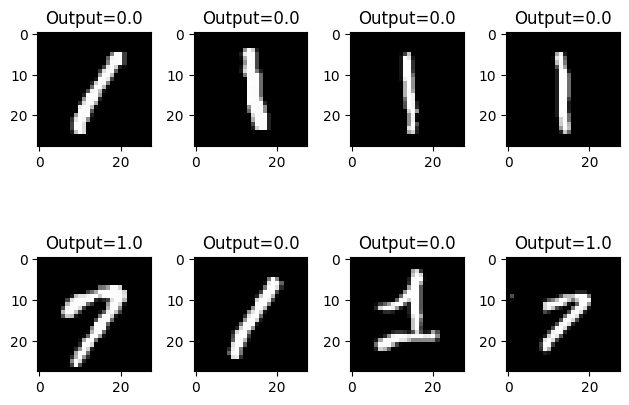

In [4]:
fig, axis = plt.subplots(2,4)
for i in range(8):
  axis[i//4, i%4].imshow(x_train_A[i], cmap='gray', vmin=0, vmax=255)
  axis[i//4, i%4].title.set_text("Output="+str(y_train_A[i]))
fig.tight_layout()
print("The first 8 examples in the train dataset A:")
fig.show()

The first 8 examples in the train dataset B:


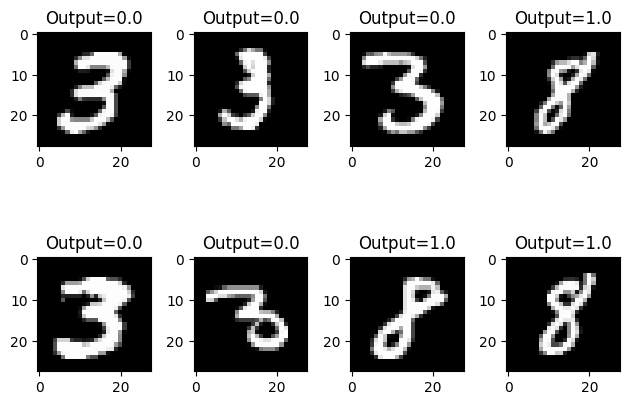

In [5]:
fig, axis = plt.subplots(2,4)
for i in range(8):
  axis[i//4, i%4].imshow(x_train_B[i], cmap='gray', vmin=0, vmax=255)
  axis[i//4, i%4].title.set_text("Output="+str(y_train_B[i]))
fig.tight_layout()
print("The first 8 examples in the train dataset B:")
fig.show()

In [6]:
x_train_A=tf.cast(tf.expand_dims(x_train_A, axis=3), tf.float32)
x_train_B=tf.cast(tf.expand_dims(x_train_B, axis=3), tf.float32)
x_test_A=tf.cast(tf.expand_dims(x_test_A, axis=3), tf.float32)
x_test_B=tf.cast(tf.expand_dims(x_test_B, axis=3), tf.float32)

In [7]:
def model(x_shape):
  input_img=tf.keras.Input(x_shape[1:]+(1,), dtype=tf.float32)
  A=tfl.Conv2D(4, (5,5))(input_img)                   #Size of A is (m,24,24,4)
  A=tfl.AveragePooling2D((2,2), (2,2))(A)             #Size of A is (m,12,12,4)
  A=tfl.Conv2D(12, (5,5))(A)                          #Size of A is (m,8,8,12)
  A=tfl.AveragePooling2D((2,2), (2,2))(A)             #Size of A is (m,4,4,12)
  A=tfl.Flatten()(A)                                  #Size of A is (m,4*4*12)
  A=tfl.Dense(1, activation='sigmoid')(A)
  return tf.keras.Model(input_img, A)

Model_B=model(x_train.shape)
Model_A=model(x_train.shape)

In [8]:
Model_B.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
Model_A.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
Model_A.fit(x_train_A, y_train_A, batch_size=64, epochs=40, callbacks=[tf.keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/Colab Notebooks/MNIST Transfer Learning Binary Classification Model_A Chechpoint.h5', save_best_only=True, monitor='loss', mode='min')])

Epoch 1/40
204/204 [==============================] - 5s 18ms/step - loss: 0.1312 - accuracy: 0.9853
Epoch 2/40
  7/204 [>.............................] - ETA: 3s - loss: 0.0558 - accuracy: 0.9955

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


204/204 [==============================] - 4s 21ms/step - loss: 0.0376 - accuracy: 0.9933
Epoch 3/40
204/204 [==============================] - 6s 27ms/step - loss: 0.0406 - accuracy: 0.9925
Epoch 4/40
204/204 [==============================] - 4s 22ms/step - loss: 0.0354 - accuracy: 0.9940
Epoch 5/40
204/204 [==============================] - 4s 18ms/step - loss: 0.0269 - accuracy: 0.9948
Epoch 6/40
204/204 [==============================] - 6s 28ms/step - loss: 0.0247 - accuracy: 0.9952
Epoch 7/40
204/204 [==============================] - 4s 20ms/step - loss: 0.0249 - accuracy: 0.9942
Epoch 8/40
204/204 [==============================] - 5s 23ms/step - loss: 0.0212 - accuracy: 0.9951
Epoch 9/40
204/204 [==============================] - 5s 22ms/step - loss: 0.0241 - accuracy: 0.9939
Epoch 10/40
204/204 [==============================] - 6s 28ms/step - loss: 0.0165 - accuracy: 0.9950
Epoch 11/40
204/204 [==============================] - 6s 27ms/step - loss: 0.0175 - accuracy: 0.9958

In [10]:
Model_B.fit(x_train_B, y_train_B, batch_size=64, epochs=40, callbacks=[tf.keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/Colab Notebooks/MNIST Transfer Learning Binary Classification Model_B Chechpoint.h5', save_best_only=True, monitor='loss', mode='min')])

Epoch 1/40
188/188 [==============================] - 7s 30ms/step - loss: 1.1765 - accuracy: 0.9123
Epoch 2/40
188/188 [==============================] - 4s 20ms/step - loss: 0.3225 - accuracy: 0.9401
Epoch 3/40
188/188 [==============================] - 4s 19ms/step - loss: 0.2419 - accuracy: 0.9450
Epoch 4/40
188/188 [==============================] - 6s 31ms/step - loss: 0.1937 - accuracy: 0.9493
Epoch 5/40
188/188 [==============================] - 3s 19ms/step - loss: 0.1911 - accuracy: 0.9475
Epoch 6/40
188/188 [==============================] - 3s 18ms/step - loss: 0.1616 - accuracy: 0.9525
Epoch 7/40
188/188 [==============================] - 4s 22ms/step - loss: 0.1469 - accuracy: 0.9559
Epoch 8/40
188/188 [==============================] - 5s 29ms/step - loss: 0.1479 - accuracy: 0.9547
Epoch 9/40
188/188 [==============================] - 4s 21ms/step - loss: 0.1351 - accuracy: 0.9581
Epoch 10/40
188/188 [==============================] - 3s 19ms/step - loss: 0.1316 - accura

In [11]:
test_loss_A_on_1_7, test_accuracy_A_on_1_7 = Model_A.evaluate(x_test_A, y_test_A)
test_loss_A_on_3_8, test_accuracy_A_on_3_8 = Model_A.evaluate(x_test_B, y_test_B)

62/62 [==============================] - 0s 5ms/step - loss: 4.8386 - accuracy: 0.5892


In [12]:
test_loss_B_on_1_7, test_accuracy_B_on_1_7 = Model_B.evaluate(x_test_A, y_test_A)
test_loss_B_on_3_8, test_accuracy_B_on_3_8 = Model_B.evaluate(x_test_B, y_test_B)

62/62 [==============================] - 0s 6ms/step - loss: 0.1029 - accuracy: 0.9723


In [13]:
Model_A_final = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST Transfer Learning Binary Classification Model_A Chechpoint.h5')
Model_B_final = tf.keras.models.load_model("/content/gdrive/MyDrive/Colab Notebooks/MNIST Transfer Learning Binary Classification Model_B Chechpoint.h5")

Now doing transfer learning.

In [14]:
Model_AB = tf.keras.models.load_model("/content/gdrive/MyDrive/Colab Notebooks/MNIST Transfer Learning Binary Classification Model_A Chechpoint.h5")
Model_BA = tf.keras.models.load_model("/content/gdrive/MyDrive/Colab Notebooks/MNIST Transfer Learning Binary Classification Model_B Chechpoint.h5")

In [15]:
Model_AB.fit(x_train_B, y_train_B, batch_size=64, epochs=40, callbacks=[tf.keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/Colab Notebooks/MNIST Transfer Learning Binary Classification Model_AB Chechpoint.h5', save_best_only=True, monitor='loss', mode='min')])

Epoch 1/40
188/188 [==============================] - 6s 28ms/step - loss: 0.3648 - accuracy: 0.9331
Epoch 2/40
  7/188 [>.............................] - ETA: 3s - loss: 0.1326 - accuracy: 0.9598

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/188 [==============================] - 4s 21ms/step - loss: 0.1385 - accuracy: 0.9561
Epoch 3/40
188/188 [==============================] - 4s 23ms/step - loss: 0.1305 - accuracy: 0.9595
Epoch 4/40
188/188 [==============================] - 8s 40ms/step - loss: 0.1175 - accuracy: 0.9623
Epoch 5/40
188/188 [==============================] - 4s 23ms/step - loss: 0.1184 - accuracy: 0.9630
Epoch 6/40
188/188 [==============================] - 4s 22ms/step - loss: 0.1167 - accuracy: 0.9619
Epoch 7/40
188/188 [==============================] - 6s 32ms/step - loss: 0.1152 - accuracy: 0.9632
Epoch 8/40
188/188 [==============================] - 4s 19ms/step - loss: 0.1173 - accuracy: 0.9631
Epoch 9/40
188/188 [==============================] - 4s 21ms/step - loss: 0.1153 - accuracy: 0.9629
Epoch 10/40
188/188 [==============================] - 5s 25ms/step - loss: 0.1149 - accuracy: 0.9631
Epoch 11/40
188/188 [==============================] - 5s 26ms/step - loss: 0.1174 - accuracy: 0.9633

In [16]:
Model_BA.fit(x_train_A, y_train_A, batch_size=64, epochs=40, callbacks=[tf.keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/Colab Notebooks/MNIST Transfer Learning Binary Classification Model_BA Chechpoint.h5', save_best_only=True, monitor='loss', mode='min')])

Epoch 1/40
204/204 [==============================] - 5s 20ms/step - loss: 0.0899 - accuracy: 0.9808
Epoch 2/40
204/204 [==============================] - 5s 24ms/step - loss: 0.0246 - accuracy: 0.9942
Epoch 3/40
204/204 [==============================] - 6s 28ms/step - loss: 0.0178 - accuracy: 0.9949
Epoch 4/40
204/204 [==============================] - 6s 27ms/step - loss: 0.0162 - accuracy: 0.9954
Epoch 5/40
204/204 [==============================] - 5s 25ms/step - loss: 0.0158 - accuracy: 0.9955
Epoch 6/40
204/204 [==============================] - 6s 28ms/step - loss: 0.0166 - accuracy: 0.9952
Epoch 7/40
204/204 [==============================] - 5s 25ms/step - loss: 0.0144 - accuracy: 0.9954
Epoch 8/40
204/204 [==============================] - 10s 50ms/step - loss: 0.0135 - accuracy: 0.9955
Epoch 9/40
204/204 [==============================] - 9s 43ms/step - loss: 0.0143 - accuracy: 0.9956
Epoch 10/40
204/204 [==============================] - 6s 31ms/step - loss: 0.0143 - accur

In [17]:
test_loss_AB_on_1_7, test_accuracy_AB_on_1_7 = Model_AB.evaluate(x_test_A, y_test_A)
test_loss_AB_on_3_8, test_accuracy_AB_on_3_8 = Model_AB.evaluate(x_test_B, y_test_B)

62/62 [==============================] - 1s 9ms/step - loss: 0.1128 - accuracy: 0.9632


In [18]:
test_loss_BA_on_1_7, test_accuracy_BA_on_1_7 = Model_BA.evaluate(x_test_A, y_test_A)
test_loss_BA_on_3_8, test_accuracy_BA_on_3_8 = Model_BA.evaluate(x_test_B, y_test_B)

62/62 [==============================] - 0s 6ms/step - loss: 4.7024 - accuracy: 0.5595


In [19]:
Model_AB_final = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST Transfer Learning Binary Classification Model_AB Chechpoint.h5')
Model_BA_final = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST Transfer Learning Binary Classification Model_BA Chechpoint.h5')

Final Accuracy Table
![picture](https://drive.google.com/uc?export=view&id=16F4ZPq1ST7iToapOsQjWoNw1wzJoLi5q)